In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

df= pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/bootcampdatasets/housing.csv")
df.head()

#"housing block" can be used to refer to a cluster of houses or apartment buildings in a particular area

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#EDA

In [ ]:
df.shape

(20640, 10)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
np.where(df['total_bedrooms'].isnull())

(array([  290,   341,   538,   563,   696,   738,  1097,  1350,  1456,
         1493,  1606,  2028,  2115,  2301,  2323,  2334,  2351,  2412,
         2420,  2578,  2608,  2647,  2826,  3024,  3328,  3354,  3376,
         3482,  3485,  3529,  3721,  3778,  3912,  3921,  3958,  4043,
         4046,  4186,  4279,  4309,  4391,  4447,  4496,  4591,  4600,
         4629,  4667,  4691,  4738,  4743,  4744,  4767,  4852,  5059,
         5216,  5222,  5236,  5654,  5665,  5678,  5723,  5751,  5990,
         6052,  6068,  6220,  6241,  6253,  6298,  6421,  6541,  6590,
         6814,  6835,  6962,  7097,  7113,  7168,  7191,  7228,  7316,
         7330,  7547,  7654,  7668,  7763,  7806,  8337,  8383,  8530,
         8915,  9149,  9571,  9620,  9622,  9814,  9845,  9877,  9942,
         9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761,
        10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741,
        12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336,
      

In [ ]:
df.iloc[290]

longitude              -122.16
latitude                 37.77
housing_median_age        47.0
total_rooms             1256.0
total_bedrooms             NaN
population               570.0
households               218.0
median_income            4.375
median_house_value    161900.0
ocean_proximity       NEAR BAY
Name: 290, dtype: object

In [ ]:
#replacing missing values with median room count
median_room_value = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_room_value, inplace=True)

In [ ]:
#What are the minimum, maximum, mean, and median values for medianHouseValue
#looking at the median_house_value and ocean_proximity of the min and max values

print(df["median_house_value"].describe())

df.groupby(["median_house_value", "ocean_proximity"]).min()

#if the houses median value is high, the closer the property will be to the ocean

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


longitude  latitude  housing_median_age  \
median_house_value ocean_proximity                                            
14999.0            INLAND             -123.17     34.24                16.0   
17500.0            <1H OCEAN          -118.33     34.15                39.0   
22500.0            INLAND             -121.29     35.43                 8.0   
                   NEAR BAY           -122.32     37.93                33.0   
                   NEAR OCEAN         -117.16     32.71                52.0   
...                                       ...       ...                 ...   
500000.0           NEAR OCEAN         -122.49     32.77                21.0   
500001.0           <1H OCEAN          -122.12     33.01                 2.0   
                   INLAND             -121.97     33.75                 4.0   
                   NEAR BAY           -122.57     37.35                 4.0   
                   NEAR OCEAN         -122.64     32.68                 4.0   

                                    total_rooms  total_bedrooms  population  \
median_house_value ocean_proximity                                            
14999.0            INLAND                  98.0            28.0        18.0   
17500.0            <1H OCEAN              493.0           168.0       259.0   
22500.0            INLAND                 107.0            79.0       167.0   
                   NEAR BAY               296.0            73.0       216.0   
                   NEAR OCEAN             845.0           451.0      1230.0   
...                                         ...             ...         ...   
500000.0           NEAR OCEAN            1209.0           309.0       442.0   
500001.0           <1H OCEAN               42.0             7.0        17.0   
                   INLAND                  45.0             7.0        30.0   
                   NEAR BAY                 8.0             1.0        13.0   
                   NEAR OCEAN             102.0            17.0        55.0   

                                    households  median_income  
median_house_value ocean_proximity                             
14999.0            INLAND                  8.0         0.5360  
17500.0            <1H OCEAN             138.0         2.3667  
22500.0            INLAND                 53.0         0.7917  
                   NEAR BAY               63.0         2.6750  
                   NEAR OCEAN            375.0         1.0918  
...                                        ...            ...  
500000.0           NEAR OCEAN            250.0         1.9891  
500001.0           <1H OCEAN               4.0         0.4999  
                   INLAND                 11.0         0.4999  
                   NEAR BAY                1.0         0.8543  
                   NEAR OCEAN             21.0         0.7025  

[7935 rows x 8 columns]

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(df['housing_median_age']))
print(z)

#checking for outliers in house hold age

0        0.982143
1        0.607019
2        1.856182
3        1.856182
4        1.856182
           ...   
20635    0.289187
20636    0.845393
20637    0.924851
20638    0.845393
20639    1.004309
Name: housing_median_age, Length: 20640, dtype: float64


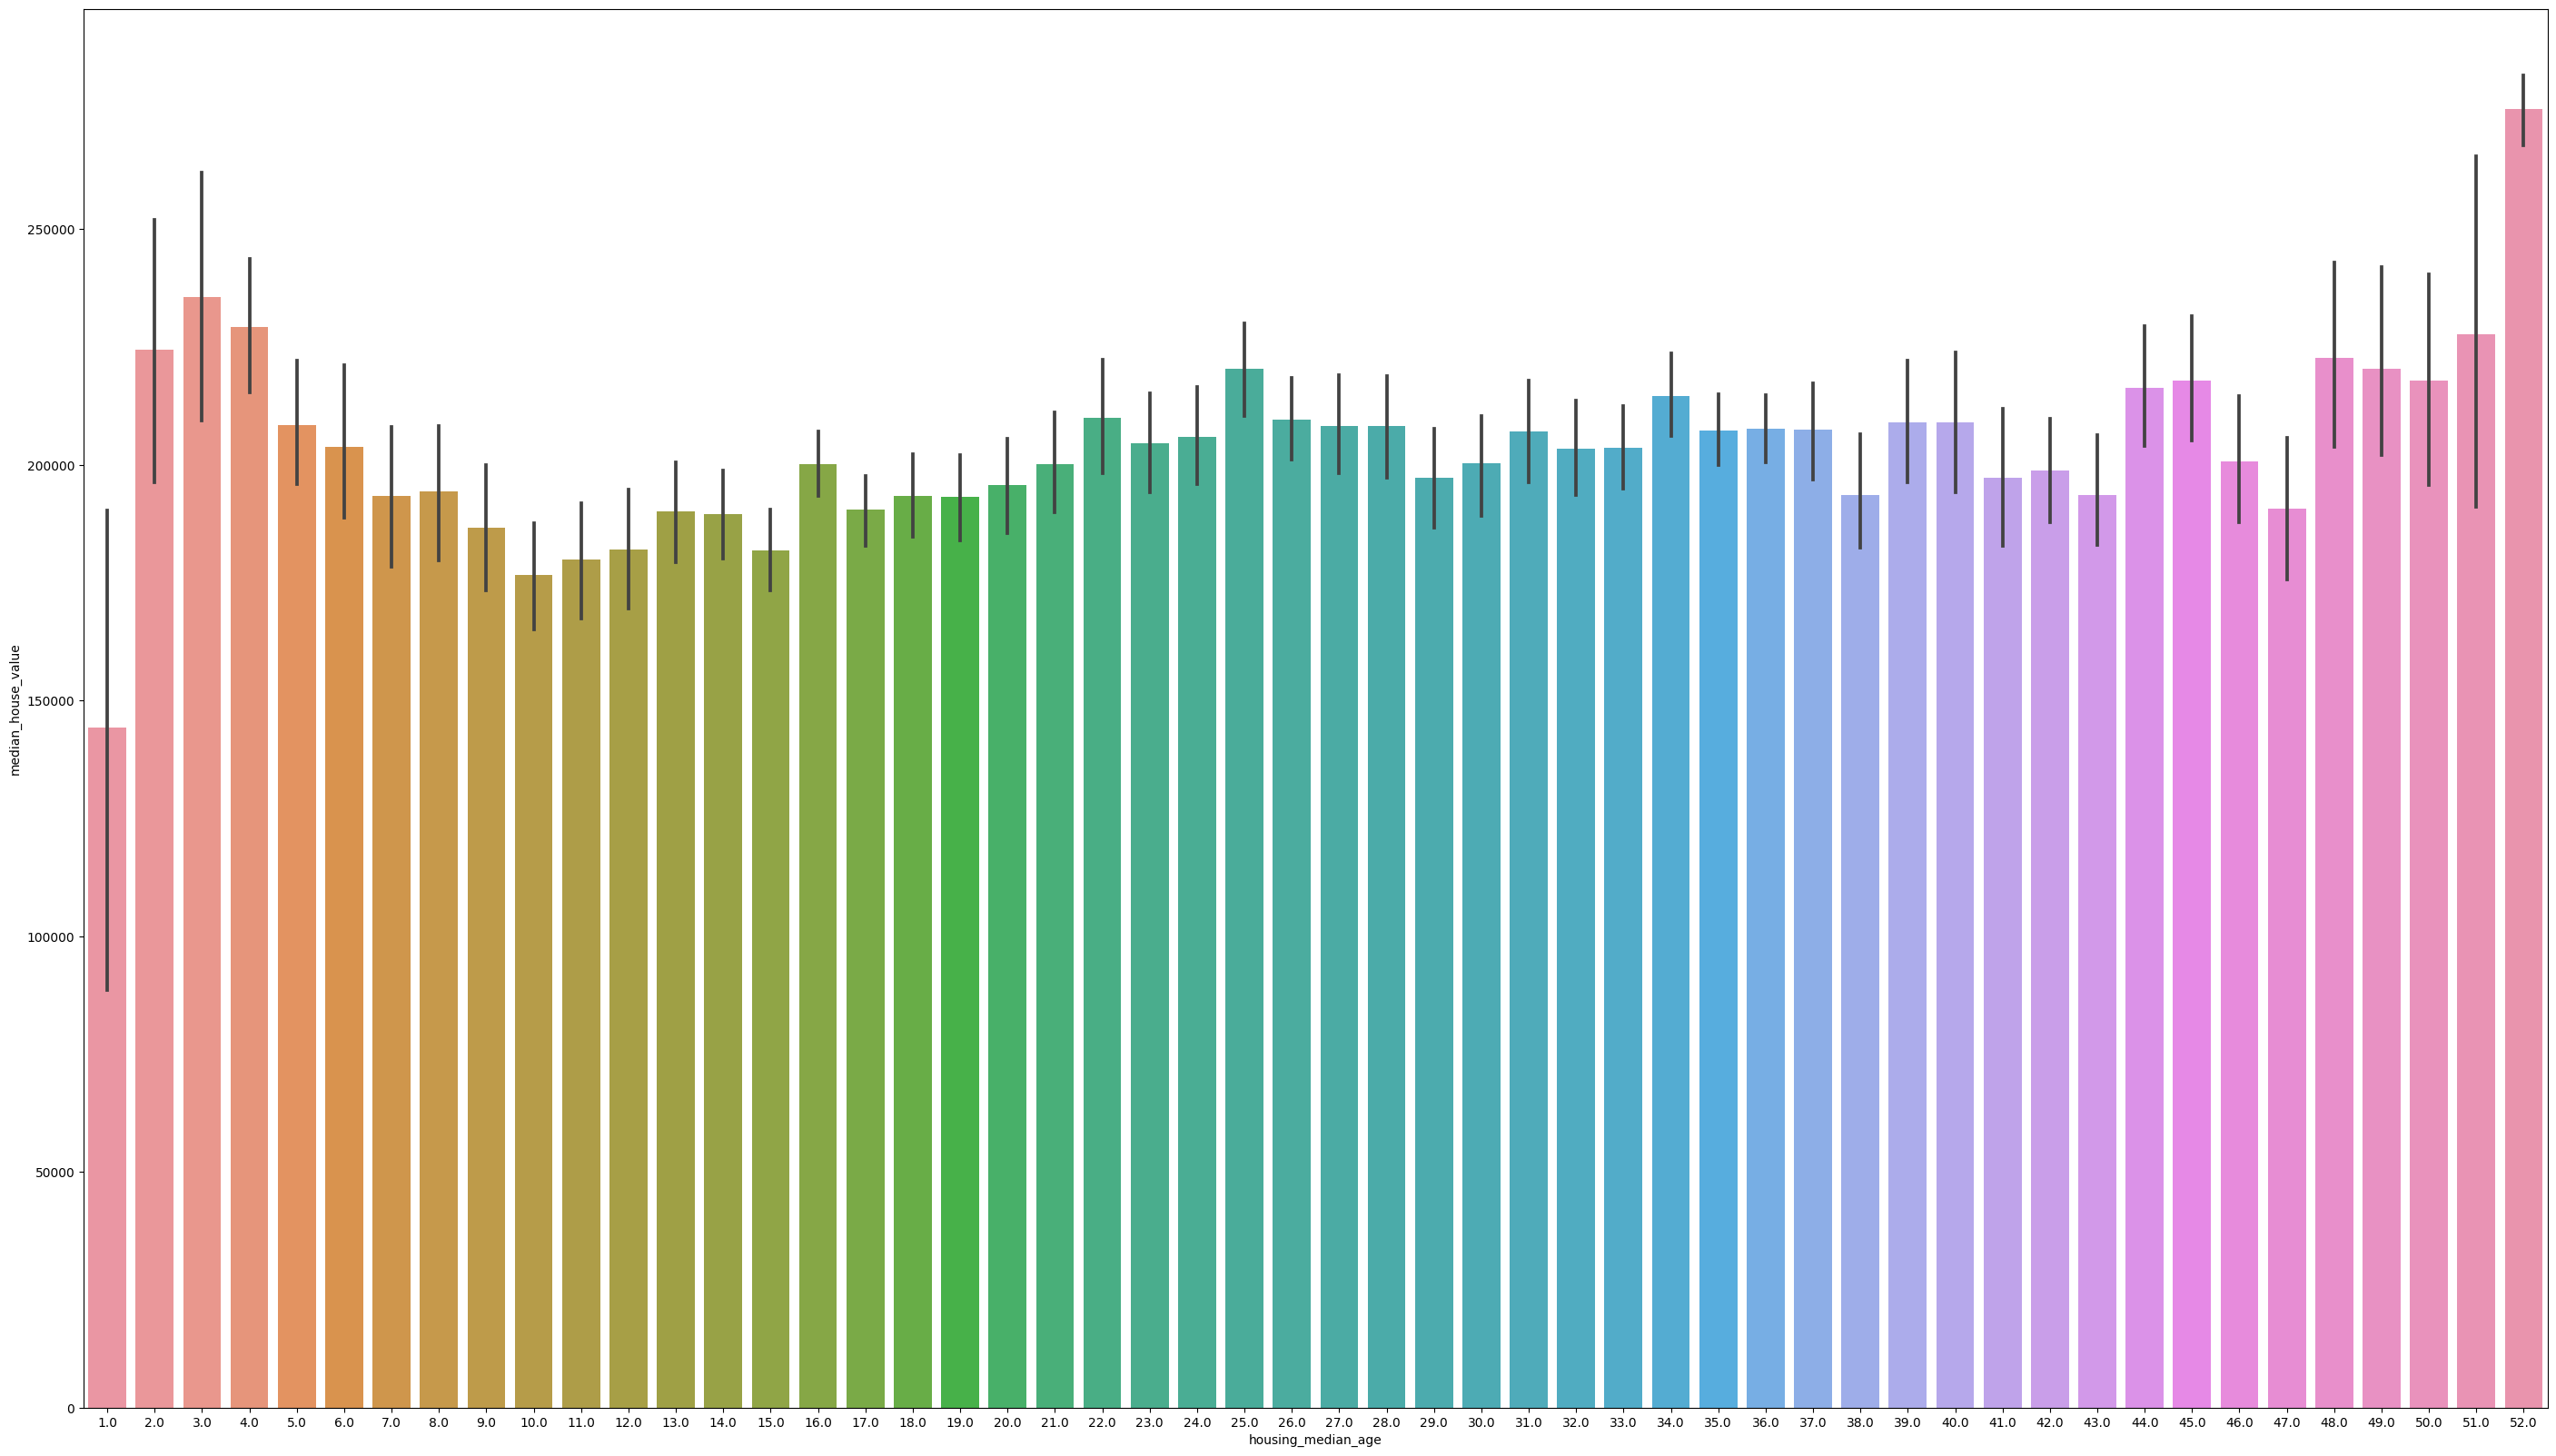

In [ ]:
#age x, value y

plt.figure(figsize=(35, 20))


sns.barplot(x=df["housing_median_age"], y=df["median_house_value"])


plt.show()

#older houses have more value


In [ ]:
df.iloc[10440]

longitude                -117.59
latitude                   33.44
housing_median_age           3.0
total_rooms               5813.0
total_bedrooms            1264.0
population                2363.0
households                1041.0
median_income             4.3897
median_house_value      341300.0
ocean_proximity       NEAR OCEAN
Name: 10440, dtype: object

In [ ]:
#median_income and household size. i want to see if higher median income is equal to higher householdsize
df.groupby(["median_income","households"]).min()

#lower income = lower household

longitude  latitude  housing_median_age  \
median_income households                                            
0.4999        6.0           -118.04     33.90                36.0   
              7.0           -122.29     37.81                46.0   
              13.0          -120.19     38.07                43.0   
              16.0          -117.75     34.06                52.0   
              19.0          -122.89     39.42                16.0   
...                             ...       ...                 ...   
15.0001       520.0         -118.40     34.10                27.0   
              550.0         -118.50     34.05                36.0   
              636.0         -118.34     33.76                34.0   
              662.0         -117.85     33.62                13.0   
              697.0         -118.40     34.11                32.0   

                          total_rooms  total_bedrooms  population  \
median_income households                                            
0.4999        6.0                15.0             5.0        15.0   
              7.0                12.0             4.0        18.0   
              13.0              102.0            19.0        44.0   
              16.0               62.0             9.0        44.0   
              19.0              411.0           114.0        26.0   
...                               ...             ...         ...   
15.0001       520.0            3979.0           510.0      1351.0   
              550.0            4152.0           542.0      1461.0   
              636.0            5586.0           674.0      1871.0   
              662.0            5192.0           658.0      1865.0   
              697.0            5578.0           753.0      1567.0   

                          median_house_value ocean_proximity  
median_income households                                      
0.4999        6.0                   162500.0       <1H OCEAN  
              7.0                    67500.0        NEAR BAY  
              13.0                  162500.0          INLAND  
              16.0                  112500.0          INLAND  
              19.0                   73500.0          INLAND  
...                                      ...             ...  
15.0001       520.0                 500001.0       <1H OCEAN  
              550.0                 500001.0       <1H OCEAN  
              636.0                 500001.0      NEAR OCEAN  
              662.0                 500001.0       <1H OCEAN  
              697.0                 500001.0       <1H OCEAN  

[20601 rows x 8 columns]

#Data Preprocesing


## predicting median_house_value

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
X= df.iloc[:, :11]
X.drop("median_house_value", axis=1, inplace=True)
X = X.values

y= df.iloc[:, 8:9].values


In [ ]:
X

array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 'INLAND']], dtype=object)

# one hot encorder for ocean_proximity

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[0.0, 0.0, 0.0, ..., 322.0, 126.0, 8.3252],
       [0.0, 0.0, 0.0, ..., 2401.0, 1138.0, 8.3014],
       [0.0, 0.0, 0.0, ..., 496.0, 177.0, 7.2574],
       ...,
       [0.0, 1.0, 0.0, ..., 1007.0, 433.0, 1.7],
       [0.0, 1.0, 0.0, ..., 741.0, 349.0, 1.8672],
       [0.0, 1.0, 0.0, ..., 1387.0, 530.0, 2.3886]], dtype=object)

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.3, random_state=1)

#scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
X_test.shape

(6192, 13)

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#you wnt to predict the median_house_value
y_pred= reg.predict(X_test)
y_pred

#these are some predicted home values

array([[242706.36932615],
       [ 93340.25102489],
       [248236.3780455 ],
       ...,
       [191410.49617981],
       [178208.45163469],
       [172670.32105228]])

#ANN

In [ ]:
import tensorflow as tf

In [ ]:
ann=tf.keras.models.Sequential()

In [ ]:
from tensorflow.keras.models import Sequential #we are adding a base Sequential model and we are adding layers to it
from tensorflow.keras.layers import Dense

In [ ]:
model= Sequential()
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

In [ ]:
model.compile(optimizer="adam", loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=350)

Epoch 1/350
452/452 [==============================] - 35s 3ms/step - loss: 55602130944.0000
Epoch 2/350
452/452 [==============================] - 2s 4ms/step - loss: 27049293824.0000
Epoch 3/350
452/452 [==============================] - 2s 4ms/step - loss: 9340277760.0000
Epoch 4/350
452/452 [==============================] - 2s 4ms/step - loss: 7502144512.0000
Epoch 5/350
452/452 [==============================] - 2s 4ms/step - loss: 6641467904.0000
Epoch 6/350
452/452 [==============================] - 1s 3ms/step - loss: 6131421184.0000
Epoch 7/350
452/452 [==============================] - 1s 2ms/step - loss: 5783833600.0000
Epoch 8/350
452/452 [==============================] - 1s 2ms/step - loss: 5526610432.0000
Epoch 9/350
452/452 [==============================] - 1s 2ms/step - loss: 5342454784.0000
Epoch 10/350
452/452 [==============================] - 1s 2ms/step - loss: 5194732544.0000
Epoch 11/350
452/452 [==============================] - 1s 2ms/step - loss: 5075089920

<Axes: >

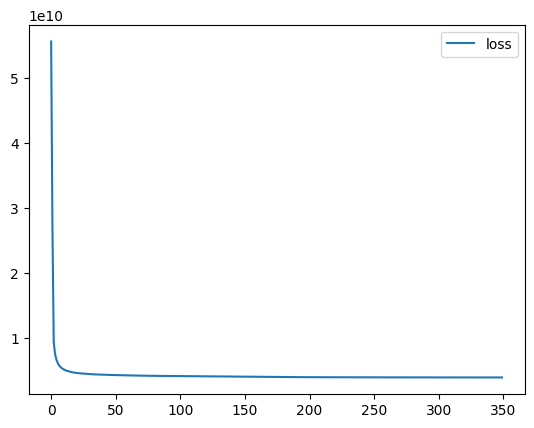

In [ ]:
loss_df= pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
model.evaluate(X_test,y_test, verbose=0)

4115127808.0

In [ ]:
test_predictions=model.predict(X_test)
test_predictions

194/194 [==============================] - 0s 2ms/step


array([[294551.97 ],
       [ 72388.164],
       [220191.72 ],
       ...,
       [157376.28 ],
       [139002.94 ],
       [181692.19 ]], dtype=float32)

In [ ]:
test_predictions=pd.Series(test_predictions.reshape(6192,))

In [ ]:
pred_df= pd.DataFrame(y_test, columns=["Test True Y"])
pred_df

,Test True Y
0,355000.0
1,70700.0
2,229400.0
3,112500.0
4,225400.0
...,...
6187,211300.0
6188,87500.0
6189,109800.0
6190,162500.0


In [ ]:
pred_df= pd.concat([pred_df,test_predictions], axis=1)

In [ ]:
pred_df.columns=["Test True Y", "Model Predictions"]
pred_df


,Test True Y,Model Predictions
0,355000.0,294551.968750
1,70700.0,72388.164062
2,229400.0,220191.718750
3,112500.0,191358.015625
4,225400.0,303004.156250
...,...,...
6187,211300.0,246073.718750
6188,87500.0,126409.742188
6189,109800.0,157376.281250
6190,162500.0,139002.937500


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

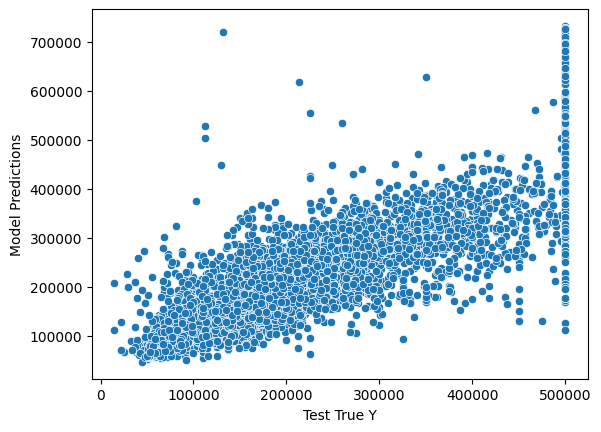

In [ ]:
sns.scatterplot(x="Test True Y", y="Model Predictions", data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

44318.53272809169